In [235]:
import pandas as pd
from scipy.integrate import solve_ivp, quad
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [236]:
γ = 1/2.4
fecha_inicio = pd.to_datetime("27-february-2020")
r = 0.7
inicio_red = 25
f = 0.9
q = 0.1356473594548552
ν = 5/12
η = 1/7
ϵ = 1/1.4
θ = 1/2.4
pa, pm, ps = 0.5, 0.476, 0.024
σ = 1/4.7
ξ = 1/4
τ = 1/5

In [243]:
ABT = pd.read_csv("D:/Edgar Trejo/Universidad/Proyecto/COVID19Model/data/cleandata/ABTrf_reg.csv", dtype={0:str}, index_col = 0)

In [256]:
pob = pd.read_csv('https://raw.githubusercontent.com/edtrelo/COVID19Model/main/data/cleandata/pob_reg.csv',
                 index_col = 0, dtype = {'cve_umun':str})

In [257]:
pob = pob['pop'].to_list()


In [245]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [246]:
ABT = ABT.to_numpy()

In [244]:
ABT

,t,i,Ia_1,Ia_2,Ia_3,Ia_4,Ia_5,Ia_6,Im_1,Im_2,...,Im_4,Im_5,Im_6,Ip_1,Ip_2,Ip_3,Ip_4,Ip_5,Ip_6,y
0,0,0,0.508881,0.000000,0.000000,0.000000,0.000000,0.042297,0.000000,0.000000,...,0.000000,0.000000,0.000000,84.705672,7.153164,22.738308,32.322087,0.071732,4.631964,0.000032
1,0,1,0.023108,0.000000,0.000000,0.000000,0.000000,0.016712,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.846387,160.647292,1.821315,30.066070,0.237499,1.830101,0.000020
2,0,2,0.036911,0.000000,0.000000,0.000000,0.000000,0.027379,0.000000,0.000000,...,0.000000,0.000000,0.000000,6.143952,3.797928,75.054415,15.489870,0.143958,2.998303,0.000017
3,0,3,0.110514,0.000000,0.000000,0.000000,0.000000,0.067374,0.000000,0.000000,...,0.000000,0.000000,0.000000,18.395562,24.511933,4.067628,133.444640,0.137843,7.378127,0.000029
4,0,4,0.012597,0.000000,0.000000,0.000000,0.000000,0.045483,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.096831,12.436270,1.970057,8.549240,15.254237,4.980870,0.000009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,94,1,173.265796,8450.327670,77.825346,1191.382649,31.075440,83.343076,148.384935,7241.148085,...,1020.524051,26.632983,71.358085,271.638960,14419.888224,120.509425,1912.985358,53.786504,127.623247,0.001094
2,94,2,357.265477,473.720928,2568.362985,848.861940,15.904876,185.502470,305.962376,405.934956,...,727.124930,13.631160,158.826644,560.106060,808.371356,3977.007012,1363.004961,27.528740,284.059922,0.000519
3,94,3,830.983676,1257.272775,168.447225,5474.602580,15.530384,302.520697,711.654934,1077.366311,...,4689.478739,13.310204,259.017290,1302.781887,2145.447324,260.833767,8790.487746,26.880555,463.249926,0.001197
4,94,4,105.668634,741.848355,98.353918,383.274806,1524.981074,262.679364,90.494683,635.695325,...,328.308590,1306.974113,224.905263,165.662920,1265.911900,152.297095,615.418642,2639.492862,402.240895,0.000931


In [247]:
train_X, test_X, train_Y, test_Y = train_test_split(ABT[:, :-1], ABT[:, -1], test_size = 0.25, random_state = 42)

In [248]:
rf.fit(train_X, train_Y)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [249]:
Y = rf.predict(ABT[:, :-1])

In [250]:
λ = lambda j, t: Y[[6*i + j for i in range(95)]][int(t)]

In [251]:
Y[[6*i + 0 for i in range(95)]][2]

4.408273910120037e-05

In [252]:
def Model(t, X):
    
    dXdt = np.zeros(6*8)
    
    S = lambda i: X[8*i + 0]
    E = lambda i: X[8*i + 1]
    Ip = lambda i: X[8*i + 2]
    Iss =  lambda i: X[8*i + 3]
    H = lambda i: X[8*i + 4]
    Ia = lambda i: X[8*i + 6]
    Im = lambda i: X[8*i + 7]
            
    for i in range(6):    
        # X_i; los componentes de cada ciudad
        # ecuación de los suceptibles para la ciudad i
        dXdt[8*i + 0] = -λ(i, t)*S(i)
        # ecuación de los expuestos para la ciudad i
        dXdt[8*i + 1] = λ(i, t)*S(i) - ϵ*E(i)
        # ecuación para los pre-infectados
        dXdt[8*i + 2] = ϵ*E(i) - θ*Ip(i)
        # ecuación para los infectados severos
        dXdt[8*i + 3] = θ*ps*Ip(i) - σ*Iss(i)
        # ecuación para los hospitalizados
        dXdt[8*i + 4] = σ*Iss(i) - (1-q)*τ*H(i) - ξ*q*H(i)
        # ecuación de los difuntos
        dXdt[8*i + 5] = q*ξ*H(i)
        # ecuación de los asintomáticos
        dXdt[8*i + 6] = θ*pa*Ip(i) - γ*Ia(i)
        # ecuación de los mild sym
        dXdt[8*i + 7] = θ*pm*Ip(i) - γ*Im(i)

    return dXdt

In [253]:
x0df = pd.read_csv("https://raw.githubusercontent.com/edtrelo/COVID19Model/main/data/cleandata/x0_reg.csv", index_col = 0)

In [254]:
x0df

,Ip0,E0
region,,
0,166,119
1,205,144
2,89,64
3,205,146
4,18,13
5,109,79


In [258]:
x0 = []
indicesCasos = [0, 5]

for i in range(6):
    if i in indicesCasos:
        x0.extend([pob[i]-x0df.iloc[i, 0]-x0df.iloc[i, 1] - 1, x0df.iloc[i, 1], x0df.iloc[i, 0], 0, 0, 0, 1, 0])
    else:
        x0.extend([pob[i]-x0df.iloc[i, 0]-x0df.iloc[i, 1], x0df.iloc[i, 1], x0df.iloc[i, 0], 0, 0, 0, 0, 0])

In [259]:
tdata = np.linspace(0, 93, 94)
    
solBase = solve_ivp(Model, (0, 94), x0, t_eval = tdata)

In [260]:
len(solBase.y)

48

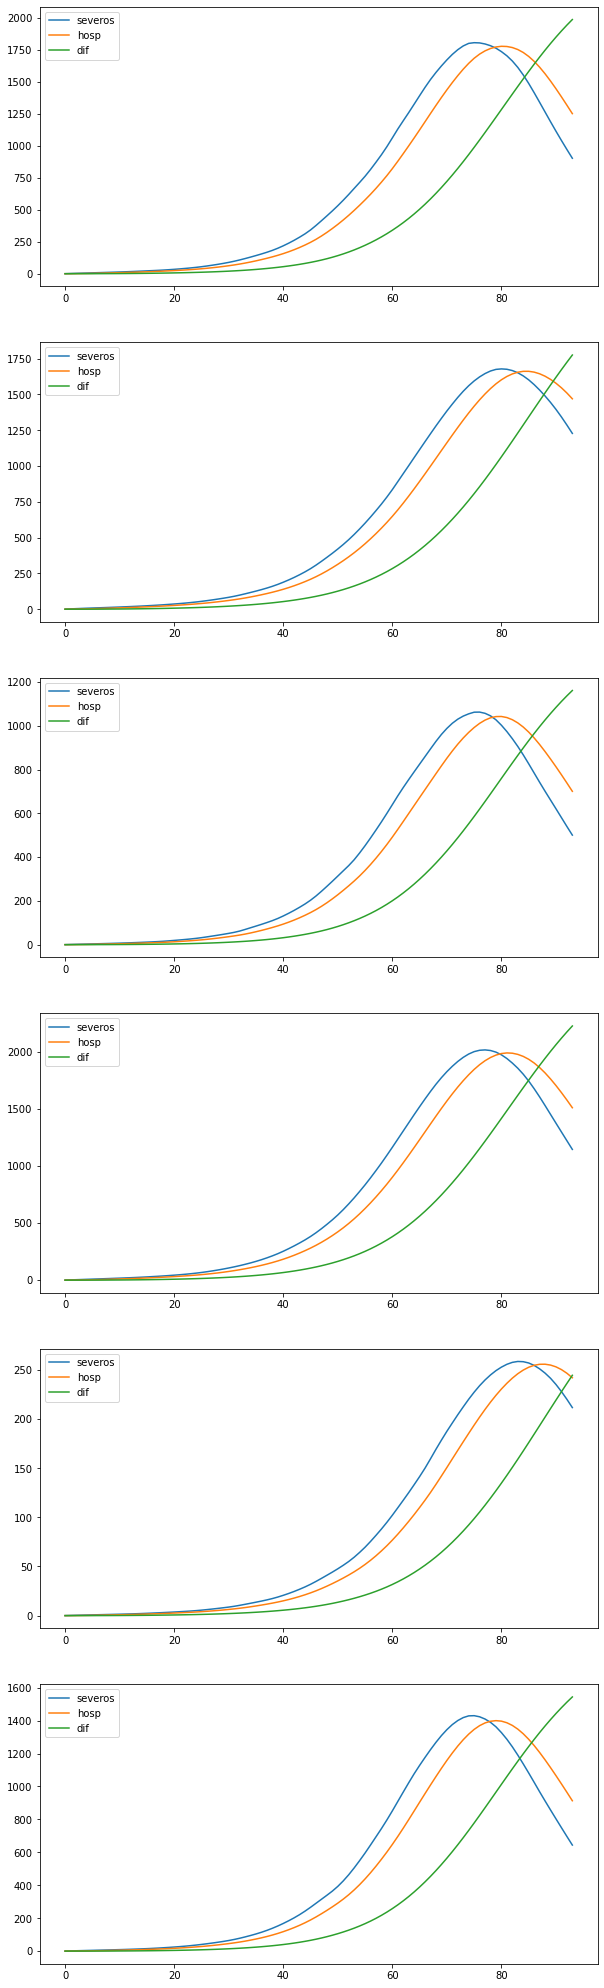

In [261]:
fig, ax = plt.subplots(6, figsize = (10, 36))

for i in range(6):
    #ax[i].plot(sol.y[8*i + 1, :], label = 'expuestos')
    #ax[i].plot(sol.y[8*i + 2, :], label = 'pre_infe')
    ax[i].plot(solBase.y[8*i + 3, :], label = 'severos')
    ax[i].plot(solBase.y[8*i + 4, :], label = 'hosp')
    ax[i].plot(solBase.y[8*i + 5, :], label = 'dif')
    #ax[i].plot(sol.y[8*i + 6, :], label ='asi')
    #ax[i].plot(sol.y[8*i + 7, :], label = 'mild')
    ax[i].legend()
    
plt.show()

In [168]:
inicio_red = 25

In [264]:
ABT[0]

array([0.00000000e+00, 0.00000000e+00, 5.08880897e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.22973293e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 8.47056721e+01, 7.15316396e+00,
       2.27383082e+01, 3.23220871e+01, 7.17319211e-02, 4.63196444e+00,
       3.21659386e-05])

In [202]:
def λ1(t, i, Ia, Im, Ip):
    
    a = np.zeros(21, dtype = np.float64)
    
    a[:6] = ABT[i, :6]
    if t > inicio_red:
        a[:6] = (1-r)*a[:6]
        
    a[6] = t
    a[7] = i
    
    for j in range(6):
        a[8+j] = Ia[j]*ABT[i, j]/sum(ABT[:, j])
    
    for j in range(6):
        a[14+j] = f*Im[j]*ABT[i, j]/sum(ABT[:, j])
    
    for j in range(6):
        
        a[20+j] = Ip[j]*ABT[i, j]/sum(ABT[:, j])
    
    return a.reshape((1, 26))

In [203]:
L = lambda t, i, Ia, Im, Ip: rf.predict(λ1(t, i, Ia, Im, Ip))[0]

In [204]:
def Model(t, X):
    
    dXdt = np.zeros(6*8)
    
    S = lambda i: X[8*i + 0]
    E = lambda i: X[8*i + 1]
    Ip = lambda i: X[8*i + 2]
    Iss =  lambda i: X[8*i + 3]
    H = lambda i: X[8*i + 4]
    Ia = lambda i: X[8*i + 6]
    Im = lambda i: X[8*i + 7]
            
    for i in range(6):    
        # X_i; los componentes de cada ciudad
        # ecuación de los suceptibles para la ciudad i
        dXdt[8*i + 0] = -L(t, i, [Ia(i) for i in range(6)], [Im(i) for i in range(6)], [Ip(i) for i in range(6)])*S(i)
        # ecuación de los expuestos para la ciudad i
        dXdt[8*i + 1] = -dXdt[8*i + 0] - ϵ*E(i)
        # ecuación para los pre-infectados
        dXdt[8*i + 2] = ϵ*E(i) - θ*Ip(i)
        # ecuación para los infectados severos
        dXdt[8*i + 3] = θ*ps*Ip(i) - σ*Iss(i)
        # ecuación para los hospitalizados
        dXdt[8*i + 4] = σ*Iss(i) - (1-q)*τ*H(i) - ξ*q*H(i)
        # ecuación de los difuntos
        dXdt[8*i + 5] = q*ξ*H(i)
        # ecuación de los asintomáticos
        dXdt[8*i + 6] = θ*pa*Ip(i) - γ*Ia(i)
        # ecuación de los mild sym
        dXdt[8*i + 7] = θ*pm*Ip(i) - γ*Im(i)

    return dXdt

In [209]:
tdata = np.linspace(0, 93, 94) #22:38 
    
sol = solve_ivp(Model, (0, 94), x0, t_eval = tdata)

In [210]:
Y = sol.y

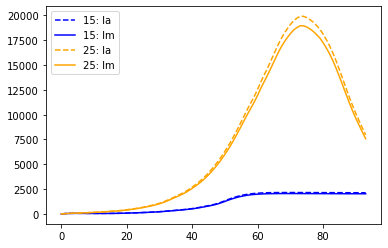

In [211]:
plt.plot()
plt.plot(Y[8*0 + 6], label = '15: Ia', linestyle = '--', color = 'b')
plt.plot(Y[8*0 + 7], label = '15: Im', color = 'b')
plt.plot(solBase.y[8*0 + 6], label = '25: Ia', linestyle = '--', color = 'orange')
plt.plot(solBase.y[8*0 + 7], label = '25: Im', color = 'orange')
plt.legend()

plt.show()